In [1]:
#Load Dataset
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ==========Load IDX Files ==========
def load_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images=np.frombuffer(f.read(),
        dtype=np.uint8)
        images = images[:(len(images)//(rows * cols))
        * rows * cols]
    return images.reshape(-1, rows *
        cols).astype(np.float32) / 255.0

def load_labels(filename):
    with open(filename, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(),
        dtype=np.uint8)
    return labels[:num]

In [ ]:
# ========== 1. Sigmoid Function ==========
def sigmoid(z):
    # TODO: Implement sigmoid function
    return 1 / (1 + np.exp(-z))

# ====== 2. Mini Batch SGD: Algorithm 7.2 ======
def sgd_minibatch(X, y, eta=0.01, max_iters=10000,
batch_size=64):
    
pass

# ===== 3. Mini Batch SGD with Momentum: Algorithm 7.3 =====
def sgd_minibatch_momentum(X, y, eta=0.01, max_iters=10000,
batch_size=64, momentum=0.9):
pass

# ====== 4. Adam Optimizer: Algorithm 7.4 ======
def sgd_Adam(X, y, eta=0.001, max_iters=10000, batch_size=64,
beta1=0.9, beta2=0.999, delta=1e-8):
pass

In [ ]:
# ==========Show Misclassified Samples ==========
def show_misclassified(X, true_labels, pred_labels, max_show=10):
    mis_idx = np.where(true_labels != pred_labels)[0][:max_show]
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(mis_idx):
        plt.subplot(1, len(mis_idx), i + 1)
        plt.imshow(X[idx, 1:].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f"T:{true_labels[idx]}\nP:{pred_labels[idx]}")
        plt.suptitle("Misclassified Samples")
        plt.show()

Binary Classification Target Digit: 3
Accuracy: 0.9777


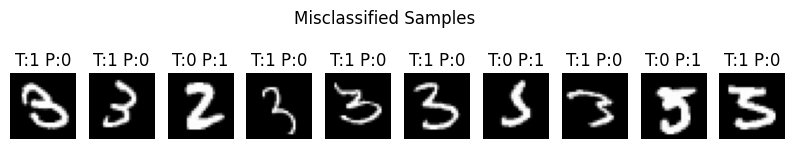

In [5]:
# ========== 3. Main ==========
# if __name__ == "__main__":
# === Load Data ===
X_train = load_images("data/train-images.idx3-ubyte___")
y_train = load_labels("data/train-labels.idx1-ubyte___")
X_test = load_images("data/t10k-images.idx3-ubyte___")
y_test = load_labels("data/t10k-labels.idx1-ubyte___")

# === Choose binary classification target digit ===
TARGET_DIGIT = 3
print(f"Binary Classification Target Digit: {TARGET_DIGIT}")

y_train_bin = np.where(y_train == TARGET_DIGIT, 1, 0)
y_test_bin = np.where(y_test == TARGET_DIGIT, 1, 0)

# === Add bias term ===
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# === Set parameters ===
eta = 0.01 # TODO: Learning rate
max_iters = 10 # TODO: Number of SGD iterations

# === Train ===
w = sgd_logistic(X_train, y_train_bin, eta, max_iters)

# === Predict ===
pred_probs = sigmoid(X_test @ w)
preds = (pred_probs >= 0.5).astype(int)

# === Evaluate ===
accuracy = np.mean(preds == y_test_bin)
print(f"Accuracy: {accuracy:.4f}")

# === Show Misclassified Samples ===
show_misclassified(X_test, y_test_bin, preds)